In [1]:
from qiskit_aer import Aer
from qiskit import * 
from qiskit.visualization import * 

In [2]:
hidden_bitstring = "0100"  # прихований рядок (секрет)
n = len(hidden_bitstring)   # кількість біт

In [3]:
def bv_oracle(s):
    qc = QuantumCircuit(len(s)+1)
    for i, bit in enumerate(s):
        if bit == "1":
            qc.cx(i, len(s))  # контрольний X на анцилярний кубіт
    return qc

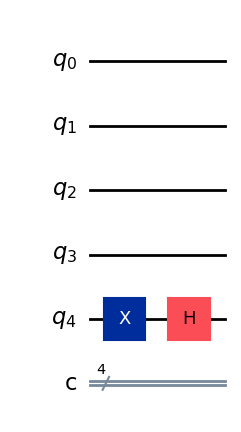

In [4]:
qc = QuantumCircuit(n+1, n)  # n кубітів + 1 анцилярний + n класичних

# Підготовка анцилярного кубіта у |-> 
qc.x(n)
qc.h(n)
qc.draw("mpl")

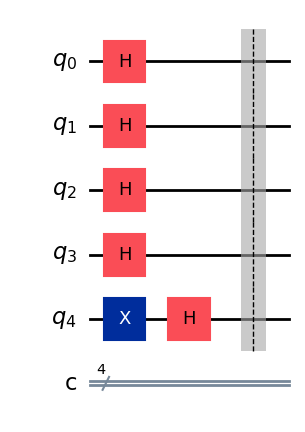

In [5]:
# Hadamard на вхідні кубіти
qc.h(range(n))
qc.barrier()
qc.draw("mpl")

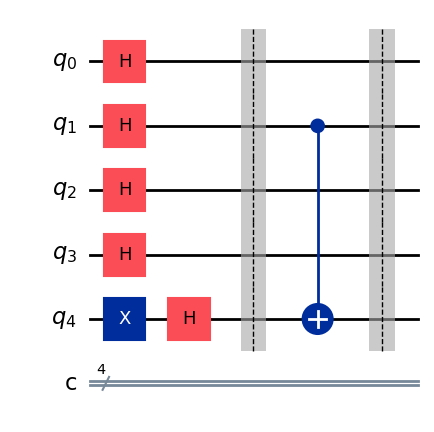

In [6]:
# Застосування Oracle
qc.compose(bv_oracle(hidden_bitstring), inplace=True)
qc.barrier()
qc.draw("mpl")

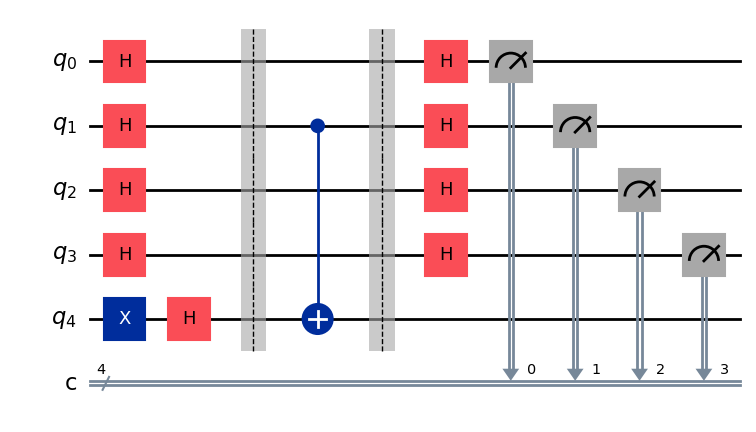

In [7]:
# Завершальні Hadamard на вхідних кубітах
qc.h(range(n))
# Міряння вхідних кубітів
qc.measure(range(n), range(n))
qc.draw("mpl")

Результати вимірювання: {'0100': 1}


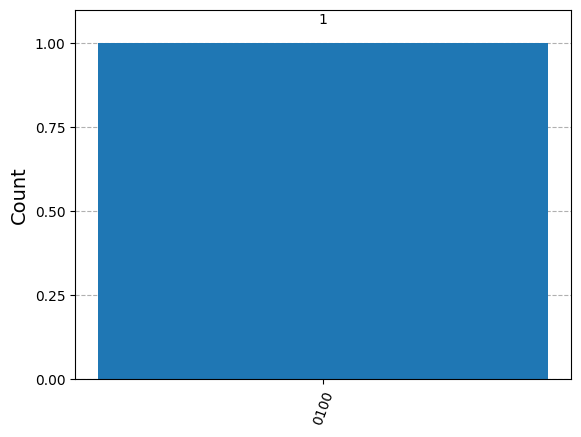

In [8]:
# створюємо симулятор
for i in range(n):
    qc.measure(i, n-1-i)
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc, shots=1).result()
counts = result.get_counts()
print("Результати вимірювання:", counts)
plot_histogram(counts)